# Figure 1: Results on the full mono-source data
This notebook creates figure 1 of the paper, which represents the results achieved on the full mono-source PBMC data.

In [1]:
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library(ggplot2)
library(dplyr)
library(purrr)
library(Seurat)
library(viridis)
library("RColorBrewer")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Loading required package: viridisLite



In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell",
              "Megakaryocyte", "Natural killer cell",
              "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet", "ItClust")
colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

sizes <- c(3090, 2418, 1373, 1022, 703, 623, 273, 126, 38)
names(sizes) <- celltypes

In [3]:
umapdata <- read.csv("../Results/Files/umap_data.csv") # umap data file
rownames(umapdata)<- umapdata$id
expressiondata_file="../Data/Fulldata/PBMC_Query/data.csv" #  expression data
measures <- read.csv("../Results/Files//values_full.csv") # results on the full data

## Figure 1a
Accuracies achieved with each of the methods of interest when using the full mono-source reference.

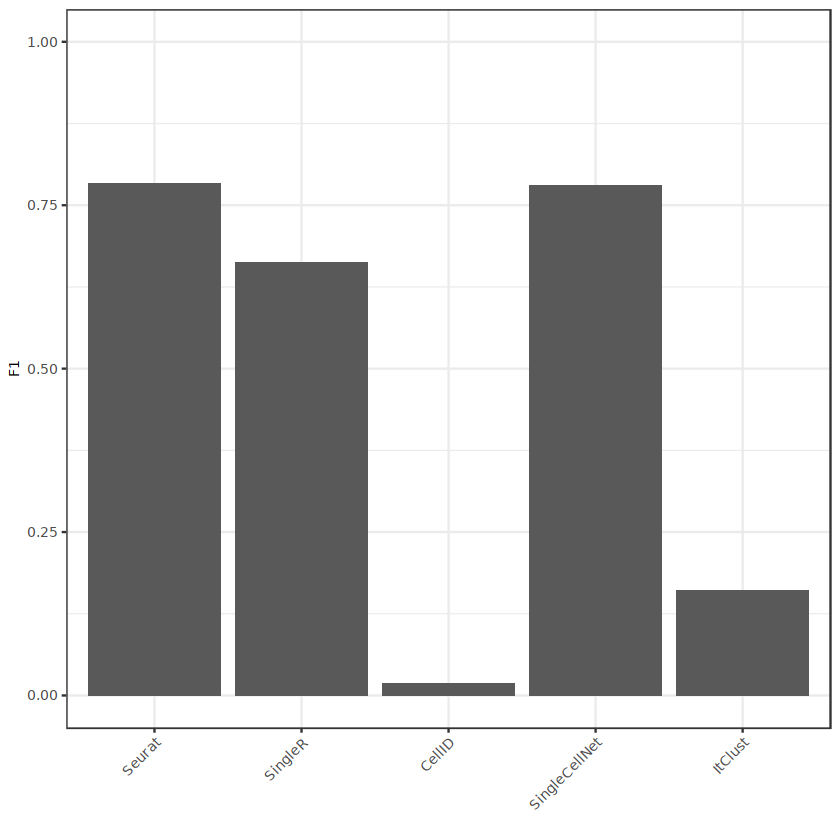

In [5]:
overall_measures <- get_overall_measures(measures, celltypes, sizes)
f1b <- ggplot(overall_measures, aes(method, f1)) + geom_bar(stat="identity")                                                                     
f1b <- addFormatting(f1a, "F1", "", legend="none", xtext="angle")

f1b              

## Figure 1 b - d
Subfigures b to d are the different colorations of the UMAP of the query data when using the different methods with the full mono-source reference.

In [6]:
umap <- prepare_umap(file = expressiondata_file, meta_data = umapdata, split = "tech")

Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 10910 column names but the data has 10911 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 500
[1] "...."
[1] "Scaling..."


Warning message:
“Argument 'center' should be of the same length as number of rows of 'x'. Use of a scalar value is deprecated: 1 != 500”


[1] "create seurat object...."
[1] "Set assay...."
[1] "PCA...."
[1] "Get UMAP..."


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


[1] "...."


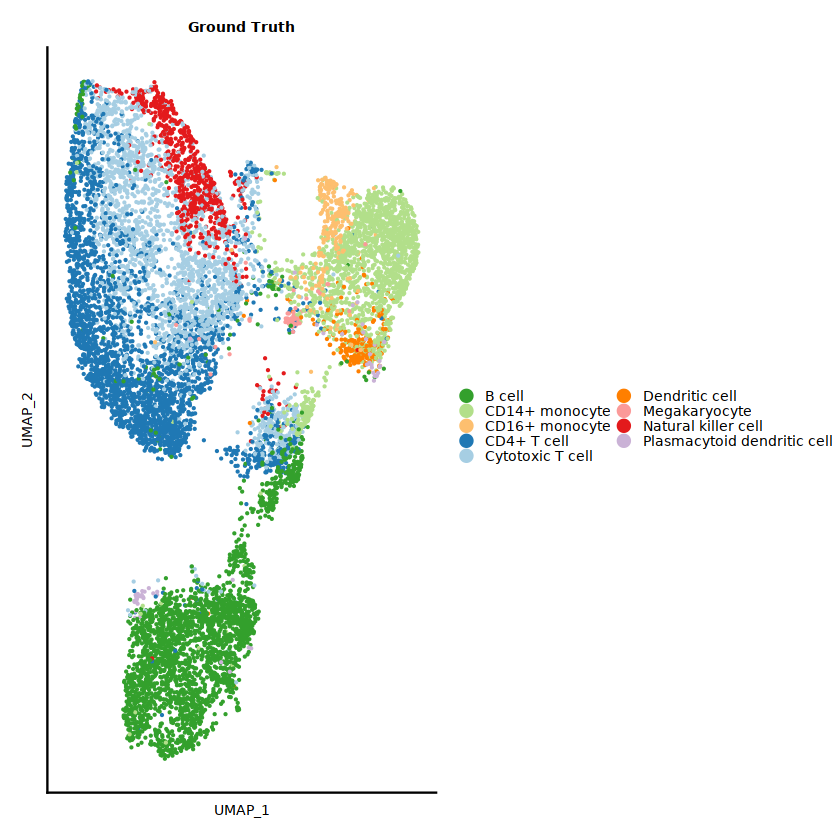

In [7]:
plot_celltypes = plot_umap(umap, c("class_"),NULL, colors,1,1, legend_ncol = 2, title="Ground Truth")
f1a <- plot_celltypes[[1]]
f1a

[1] "...."


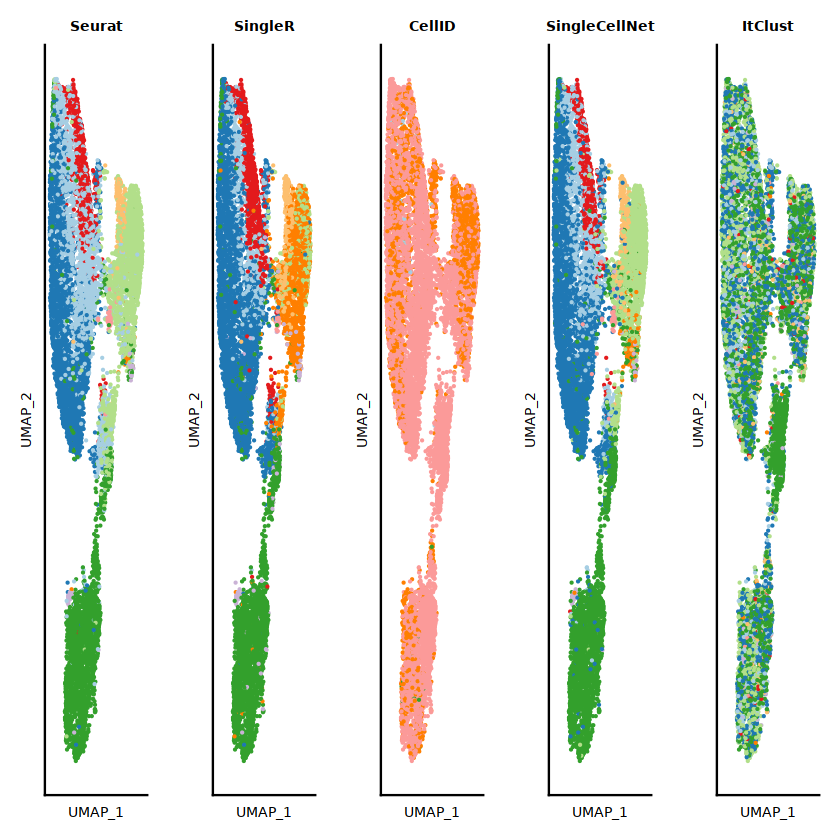

In [9]:
plots_full <- plot_umap(umap, c(paste(sep="_", "fullPred",methods)), NULL, color=colors, 1,1, legend_ncol = 5) 
names(plots_full) <- methods
plots_full <- lapply(seq(1,length(methods),1) , function(n) plots_full[[n]] + labs(title= methods[n]))
                  
f1c <- ggpubr::ggarrange(plotlist = plots_full, font.label = list(size = 10),
                         common.legend = F, legend = "none", ncol=5, nrow=1)
f1c

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


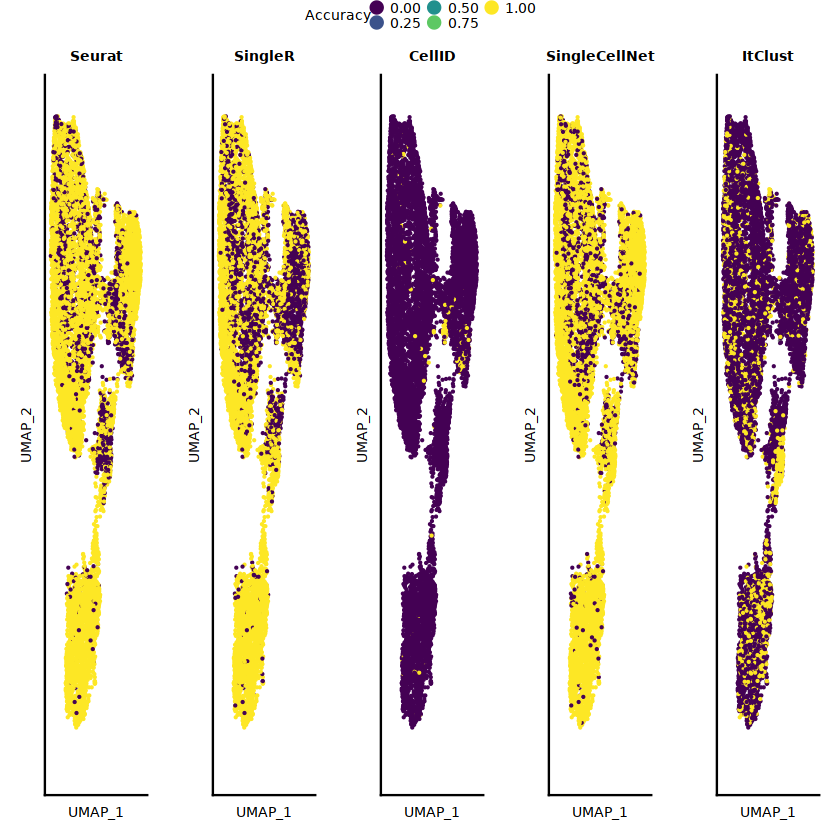

In [10]:
plots <- plot_features(umap, c(paste(sep="_", "full",methods)), NULL, 1,1, legend_ncol = 3) 
names(plots) <- methods
plots <- lapply(seq(1,length(methods),1) , function(n) plots[[n]]+ labs(title= methods[n]))                
f1d <- ggpubr::ggarrange(plotlist = plots, font.label = list(size = 10), 
                         common.legend = T, legend = "top", ncol=5, nrow=1)
f1d


## Figure 1 e and f 

In [11]:
measures$class <- factor(measures$class, levels=celltypes)
measures$method <- factor(measures$method, levels=methods)

f1e <- ggplot(measures, aes(class, accuracy, fill=class)) + geom_bar(stat="identity") +
        facet_grid(cols = vars(method)) 
f1e <- addFormatting(f1e, "Accuracy", "Cell types",legend="none", xtext = "none",celltypes = colors, ylim=c(0,1))
        
f1f <-  ggplot(measures, aes(class, precision, fill=class)) + geom_bar(stat="identity") +
        facet_grid(cols = vars(method)) 
f1f <- addFormatting(f1f, "Precision", "Cell types",legend="none", xtext = "none",celltypes = colors, ylim=c(0,1))

        
f1g <-  ggplot(measures, aes(class, f1, fill=class)) + geom_bar(stat="identity") +
        facet_grid(cols = vars(method)) 
f1g <- addFormatting(f1g, "F1", "Cell types",legend="none", xtext = "none",celltypes = colors, ylim=c(0,1))

## Combine the Subfigures

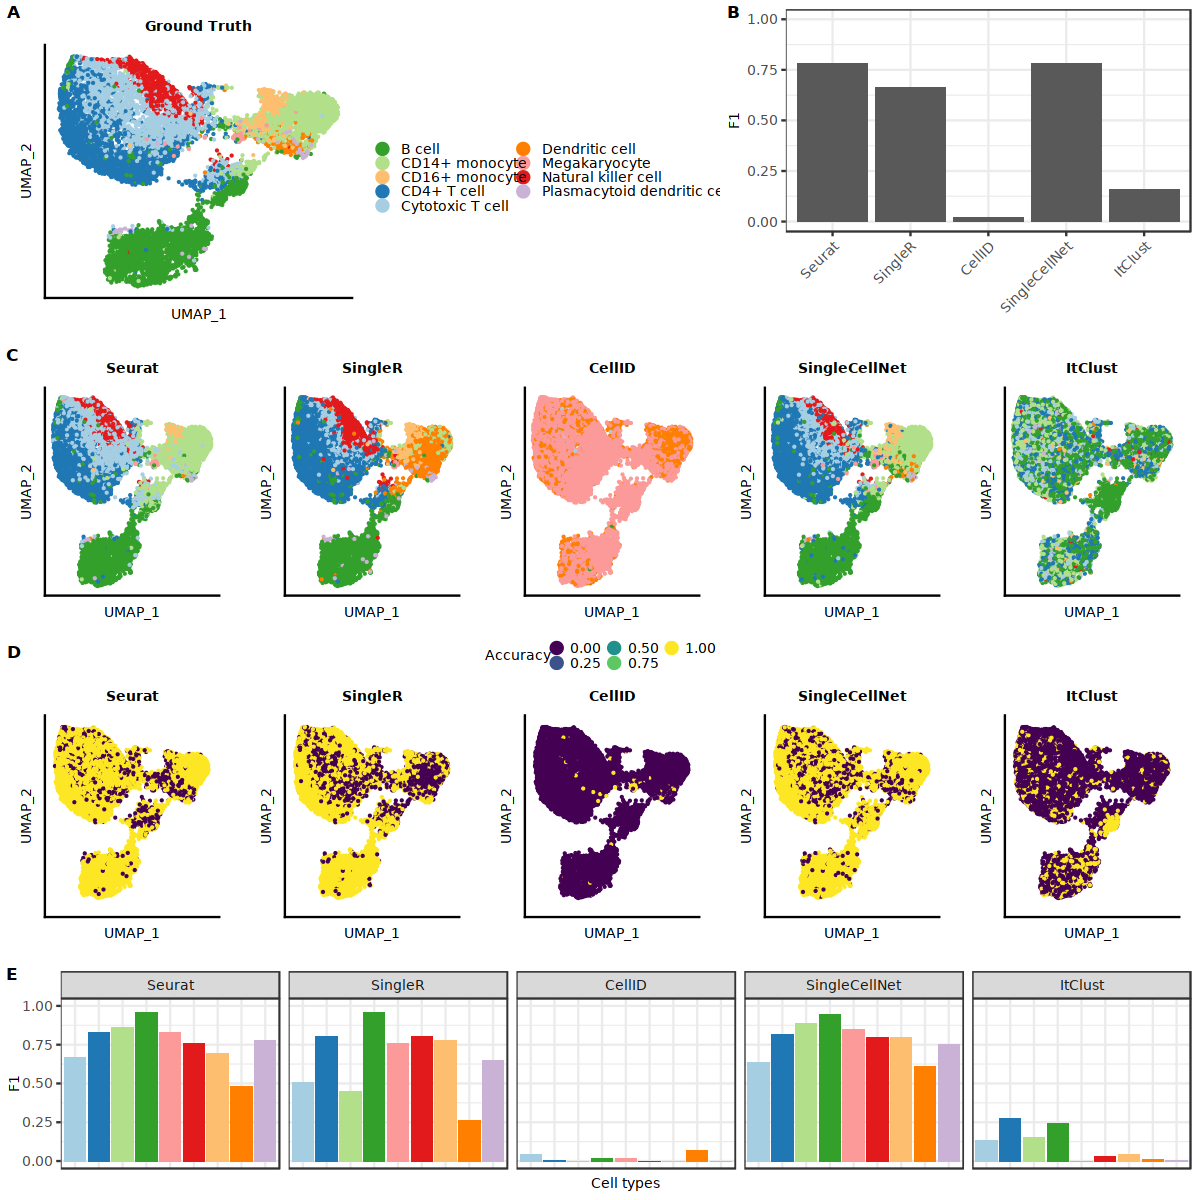

In [13]:
options(repr.plot.width=10, repr.plot.height=10)  
f1ab <- ggpubr::ggarrange(f1b,f1a,  nrow=1, ncol=2,
                          font.label = list(size = 10),
                          labels= c("A", "B"), widths=c(1.5,1))
f1cdef <- ggpubr::ggarrange(f1c,f1d, f1g, nrow=3, ncol=1,
                           font.label = list(size = 10),
                          labels= c("C", "D", "E"), heights=c(1.25,1.35,1))

f1 <- ggpubr::ggarrange(f1ab,f1cdef, nrow=2, ncol=1, heights=c(1.2,3))
f1

In [15]:
ggsave(
  "../Results/Figures/F1_PBMC_full.jpg",
  plot = f1,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 160,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)

Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”


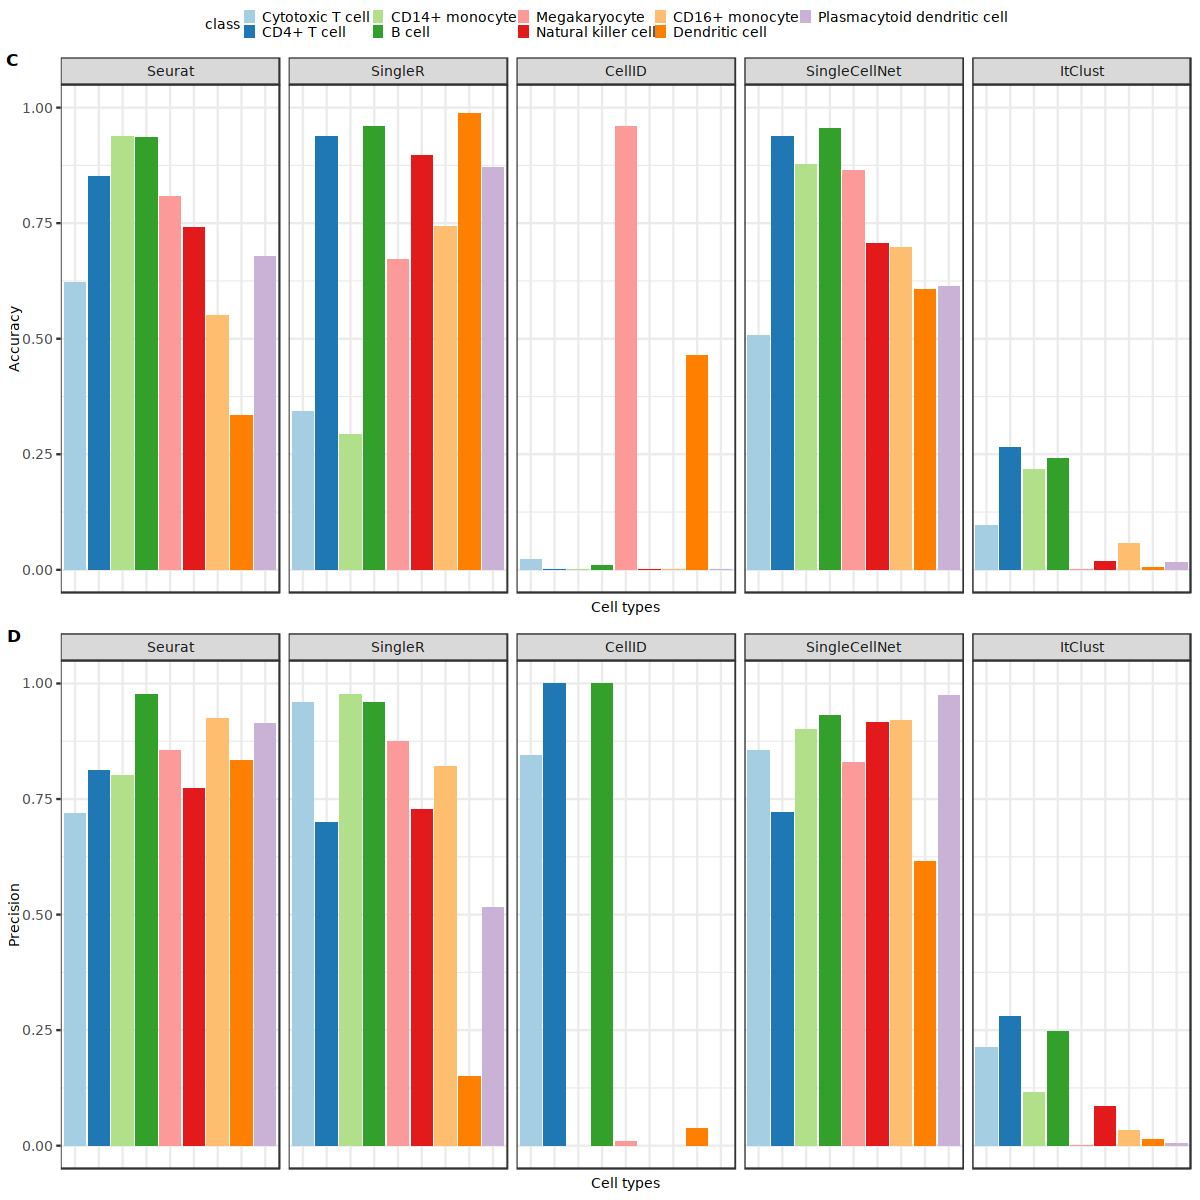

In [16]:
s1 <- ggpubr::ggarrange(f1e,f1f,  nrow=2, ncol=1, common.legend = T,
                            font.label = list(size = 10),
                          labels= c("C", "D", "E"), heights=c(1,1))

s1
ggsave(
  "../Results/Figures/S1_PBMC_accuracy_precision.jpg",
  plot = s1,
  device = "jpg",
  path = NULL,
  scale = 1,
  width = 180,
  height = 100,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = "white"
)